# Data Analytics Project - Backtesting Model Predictions

# TATAMTRDVR STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of TATAMTRDVR

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair4/Pair4_orders.csv')
orders_df.head()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-21,88.250000,83.150002,5.099998,-0.329109,FLAT
3,2019-05-22,87.849998,85.400002,2.449997,-1.330453,FLAT
4,2019-05-23,88.849998,84.849998,4.000000,-0.744760,FLAT


In [3]:
orders_df.tail()

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
57,2019-08-07,61.150002,55.650002,5.500000,-0.177963,FLAT
58,2019-08-08,63.549999,58.750000,4.799999,-0.442469,FLAT
59,2019-08-09,64.300003,58.200001,6.100002,0.048757,FLAT
60,2019-08-13,61.549999,57.700001,3.849998,-0.801441,FLAT
61,2019-08-14,62.549999,57.349998,5.200001,-0.291322,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

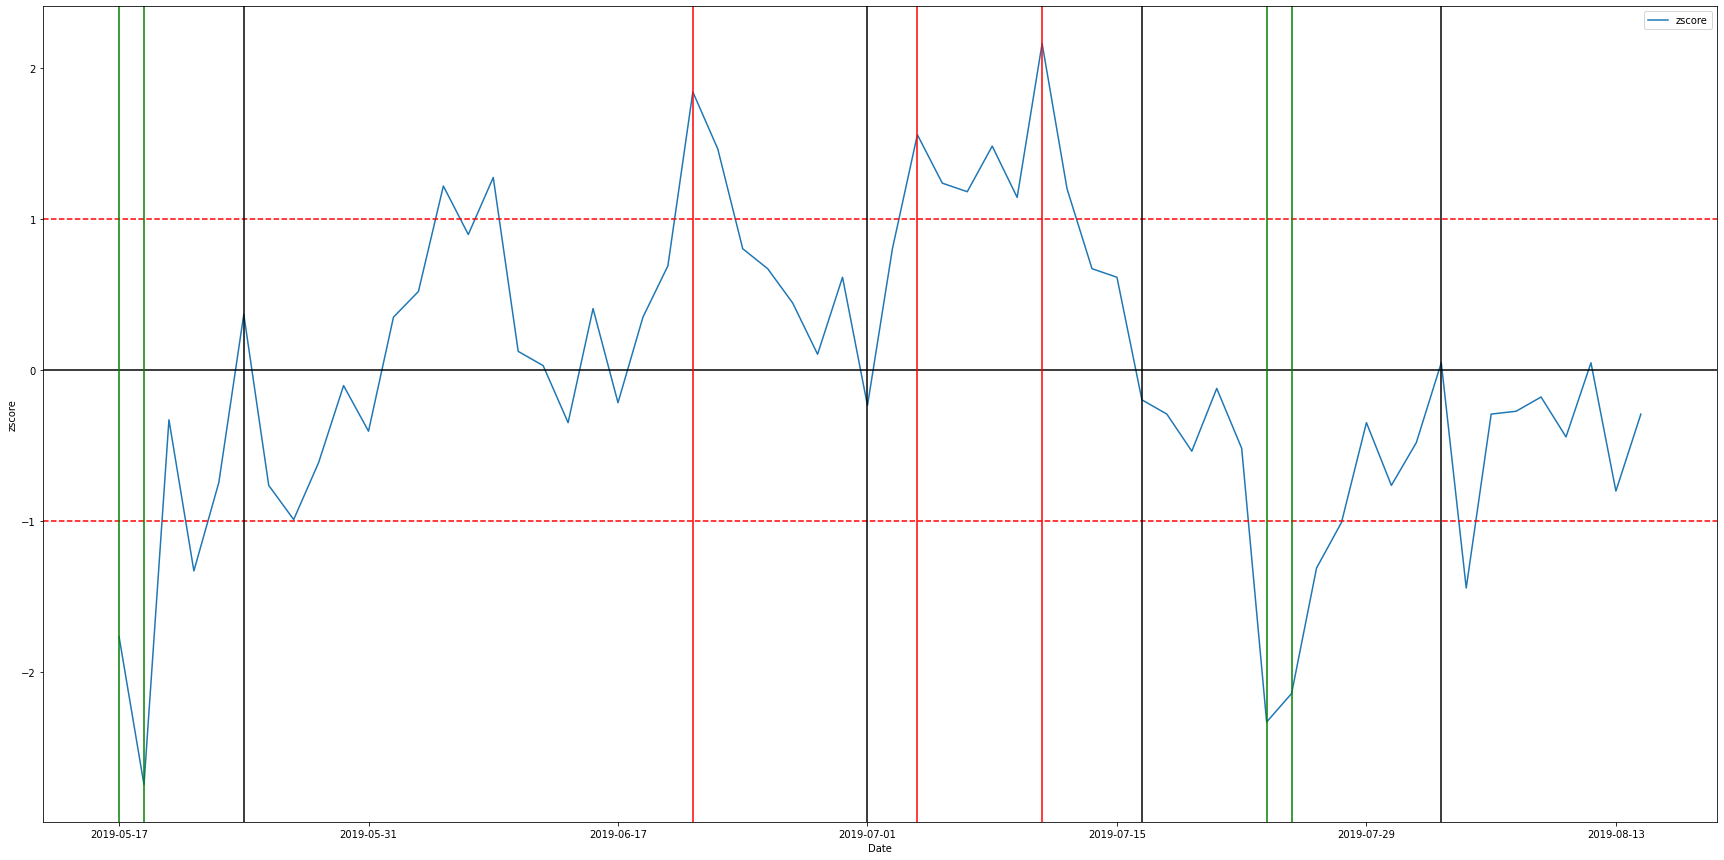

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of TATAMTRDVR

In [5]:
predictions = pd.read_csv("../Models/Pair4/Tata_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2019-05-17,83.199997,145.655884,128.025796,NaN
1,2019-05-20,88.849998,145.384391,127.611621,NaN
2,2019-05-21,83.150002,145.112899,129.149894,NaN
3,2019-05-22,85.400002,144.841406,123.576205,NaN
4,2019-05-23,84.849998,143.197024,120.873591,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2019-05-31,83.949997,139.923686,127.221978,141.45230
11,2019-06-03,84.949997,139.380701,125.422256,141.00316
12,2019-06-04,85.699997,137.736318,126.093696,140.23953
13,2019-06-06,82.099998,137.464826,128.022561,139.03557
14,2019-06-07,81.650002,137.193333,129.136564,137.32983


## 2.4 Visualize the predictions by different models

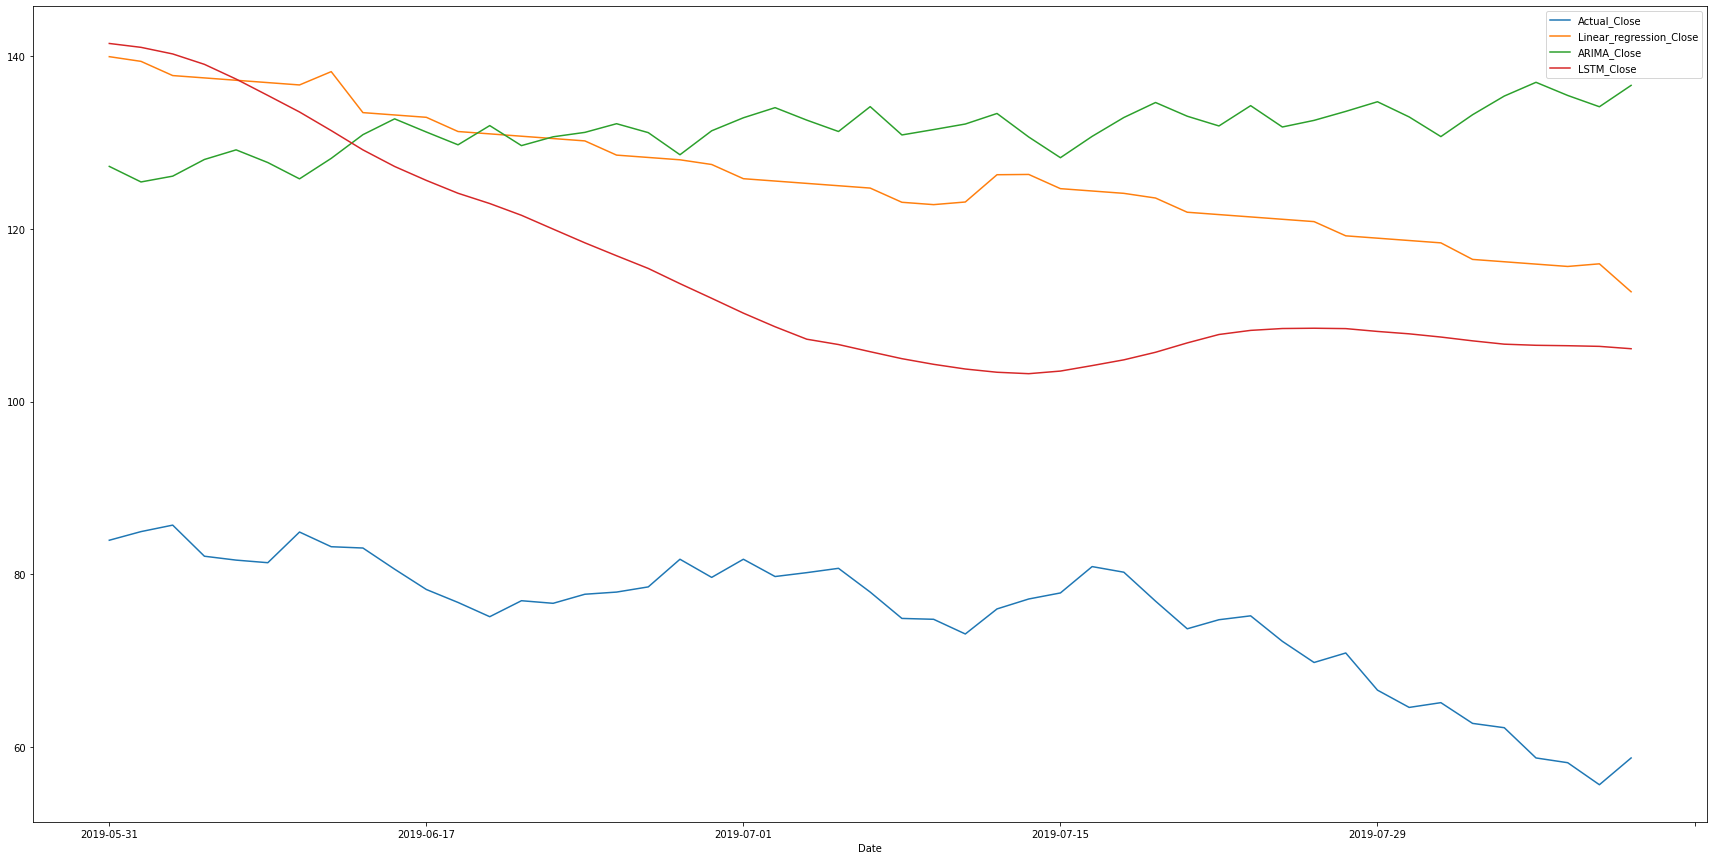

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
5,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
23,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
30,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
32,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
37,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
41,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
46,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
47,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,LONG
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,LONG
2,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
3,2019-06-20,87.800003,76.949997,10.850006,1.843619,SHORT
4,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
5,2019-07-03,90.300003,80.199997,10.100006,1.560220,SHORT
6,2019-07-10,84.800003,73.099998,11.700005,2.164804,SHORT
7,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
8,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,LONG
9,2019-07-24,72.550003,72.250000,0.300003,-2.142861,LONG


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
0,2019-05-17,84.500000,83.199997,1.300003,-1.764996,SHORT
1,2019-05-20,87.550003,88.849998,-1.299995,-2.747445,SHORT
2,2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
3,2019-06-20,87.800003,76.949997,10.850006,1.843619,LONG
4,2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
5,2019-07-03,90.300003,80.199997,10.100006,1.560220,LONG
6,2019-07-10,84.800003,73.099998,11.700005,2.164804,LONG
7,2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
8,2019-07-23,75.000000,75.199997,-0.199997,-2.331794,SHORT
9,2019-07-24,72.550003,72.250000,0.300003,-2.142861,SHORT


- As TATAMTRDVR is the stock with the lower price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
Date,,,,,
2019-05-17,84.500000,83.199997,1.300003,-1.764996,SHORT
2019-05-20,87.550003,88.849998,-1.299995,-2.747445,SHORT
2019-05-24,93.800003,86.849998,6.950005,0.369944,GET_OUT_OF_POSITION
2019-06-20,87.800003,76.949997,10.850006,1.843619,LONG
2019-07-01,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
2019-07-03,90.300003,80.199997,10.100006,1.560220,LONG
2019-07-10,84.800003,73.099998,11.700005,2.164804,LONG
2019-07-16,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
2019-07-23,75.000000,75.199997,-0.199997,-2.331794,SHORT


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2019-05-31,83.949997,139.923686,127.221978,141.452300
2019-06-03,84.949997,139.380701,125.422256,141.003160
2019-06-04,85.699997,137.736318,126.093696,140.239530
2019-06-06,82.099998,137.464826,128.022561,139.035570
2019-06-07,81.650002,137.193333,129.136564,137.329830
2019-06-10,81.349998,136.921841,127.668363,135.438100
2019-06-11,84.900002,136.650348,125.781528,133.521130
2019-06-12,83.199997,138.191329,128.151713,131.366640
2019-06-13,83.050003,133.447071,130.896111,129.134570


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,ASHOKLEY_Close,TATAMTRDVR_Close,Spread,zscore,Orders
Date,,,,,,,,,
2019-06-20,76.949997,130.716718,129.628555,121.563644,87.800003,76.949997,10.850006,1.843619,LONG
2019-07-01,81.750000,125.798998,132.850137,110.237816,87.099998,81.750000,5.349998,-0.234643,GET_OUT_OF_POSITION
2019-07-03,80.199997,125.256013,132.578037,107.220060,90.300003,80.199997,10.100006,1.560220,LONG
2019-07-10,73.099998,123.101569,132.127334,103.769720,84.800003,73.099998,11.700005,2.164804,LONG
2019-07-16,80.900002,124.375439,130.698459,104.165740,86.349998,80.900002,5.449997,-0.196857,GET_OUT_OF_POSITION
2019-07-23,75.199997,121.373594,134.252863,108.241960,75.000000,75.199997,-0.199997,-2.331794,SHORT
2019-07-24,72.250000,121.102101,131.784740,108.456950,72.550003,72.250000,0.300003,-2.142861,SHORT
2019-08-01,62.750000,116.455873,133.204264,107.030400,68.849998,62.750000,6.099998,0.048756,GET_OUT_OF_POSITION


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['ASHOKLEY_Close', 'TATAMTRDVR_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2019-06-20,76.949997,130.716718,129.628555,121.563644,LONG
2019-07-01,81.750000,125.798998,132.850137,110.237816,GET_OUT_OF_POSITION
2019-07-03,80.199997,125.256013,132.578037,107.220060,LONG
2019-07-10,73.099998,123.101569,132.127334,103.769720,LONG
2019-07-16,80.900002,124.375439,130.698459,104.165740,GET_OUT_OF_POSITION
2019-07-23,75.199997,121.373594,134.252863,108.241960,SHORT
2019-07-24,72.250000,121.102101,131.784740,108.456950,SHORT
2019-08-01,62.750000,116.455873,133.204264,107.030400,GET_OUT_OF_POSITION


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 76.94999694824219 130.71671828985563 129.62855484153818 121.563644 LONG
number of shares:  259.0
actual profit:  1243.2007904052734
LR profit:  -1273.6896248249104
ARIMA profit:  834.3897355381968
LSTM profit:  -2933.3894520000003


ORDER:  1 81.75 125.7989977306861 132.85013683203314 110.237816 GET_OUT_OF_POSITION


ORDER:  2 80.19999694824219 125.25601285867742 132.57803662510236 107.22006 LONG
number of shares:  249.0
actual profit:  174.30113983154297
LR profit:  -219.2629770420317
ARIMA profit:  -468.0147574037622
LSTM profit:  -760.525680000001


ORDER:  3 73.0999984741211 123.10156864084999 132.12733369033904 103.76971999999999 LONG
number of shares:  273.0
actual profit:  2129.400833129883
LR profit:  347.7665135051434
ARIMA profit:  -390.08271234867993
LSTM profit:  108.11346000000195


ORDER:  4 80.9000015258789 124.37543865368934 130.69845928613142 104.16574 GET_OUT_OF_POSITION


ORDER:  5 75.19999694824219 121.37359350209593 134.2528633145258 108.24196 SHORT
numb

In [19]:
actual_profits

[1243.2007904052734,
 0,
 174.30113983154297,
 2129.400833129883,
 0,
 3299.2491912841797,
 2622.0,
 0]

In [20]:
LR_profits

[-1273.6896248249104,
 0,
 -219.2629770420317,
 347.7665135051434,
 0,
 1303.1959481876477,
 1282.3589620016282,
 0]

In [21]:
LSTM_profits

[-2933.3894520000003,
 0,
 -760.525680000001,
 108.11346000000195,
 0,
 321.06340000000154,
 393.72780000000165,
 0]

In [22]:
shares

[259.0, 0, 249.0, 273.0, 0, 265.0, 276.0, 0]

In [23]:
ARIMA_profits

[834.3897355381968,
 0,
 -468.0147574037622,
 -390.08271234867993,
 0,
 277.8787639908384,
 -391.7887516273827,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2019-06-20,76.949997,130.716718,129.628555,121.563644,LONG
2019-07-01,81.750000,125.798998,132.850137,110.237816,GET_OUT_OF_POSITION
2019-07-03,80.199997,125.256013,132.578037,107.220060,LONG
2019-07-10,73.099998,123.101569,132.127334,103.769720,LONG
2019-07-16,80.900002,124.375439,130.698459,104.165740,GET_OUT_OF_POSITION
2019-07-23,75.199997,121.373594,134.252863,108.241960,SHORT
2019-07-24,72.250000,121.102101,131.784740,108.456950,SHORT
2019-08-01,62.750000,116.455873,133.204264,107.030400,GET_OUT_OF_POSITION


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2019-06-20,76.949997,130.716718,129.628555,121.563644,LONG,259.0,1243.200790,-1273.689625,834.389736,-2933.389452
2019-07-01,81.750000,125.798998,132.850137,110.237816,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2019-07-03,80.199997,125.256013,132.578037,107.220060,LONG,249.0,174.301140,-219.262977,-468.014757,-760.525680
2019-07-10,73.099998,123.101569,132.127334,103.769720,LONG,273.0,2129.400833,347.766514,-390.082712,108.113460
2019-07-16,80.900002,124.375439,130.698459,104.165740,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2019-07-23,75.199997,121.373594,134.252863,108.241960,SHORT,265.0,3299.249191,1303.195948,277.878764,321.063400
2019-07-24,72.250000,121.102101,131.784740,108.456950,SHORT,276.0,2622.000000,1282.358962,-391.788752,393.727800
2019-08-01,62.750000,116.455873,133.204264,107.030400,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2019-06-20,76.949997,130.716718,129.628555,121.563644,LONG,259.0,1243.200790,-1273.689625,834.389736,-2933.389452
1,2019-07-01,81.750000,125.798998,132.850137,110.237816,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
2,2019-07-03,80.199997,125.256013,132.578037,107.220060,LONG,249.0,174.301140,-219.262977,-468.014757,-760.525680
3,2019-07-10,73.099998,123.101569,132.127334,103.769720,LONG,273.0,2129.400833,347.766514,-390.082712,108.113460
4,2019-07-16,80.900002,124.375439,130.698459,104.165740,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000
5,2019-07-23,75.199997,121.373594,134.252863,108.241960,SHORT,265.0,3299.249191,1303.195948,277.878764,321.063400
6,2019-07-24,72.250000,121.102101,131.784740,108.456950,SHORT,276.0,2622.000000,1282.358962,-391.788752,393.727800
7,2019-08-01,62.750000,116.455873,133.204264,107.030400,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.000000


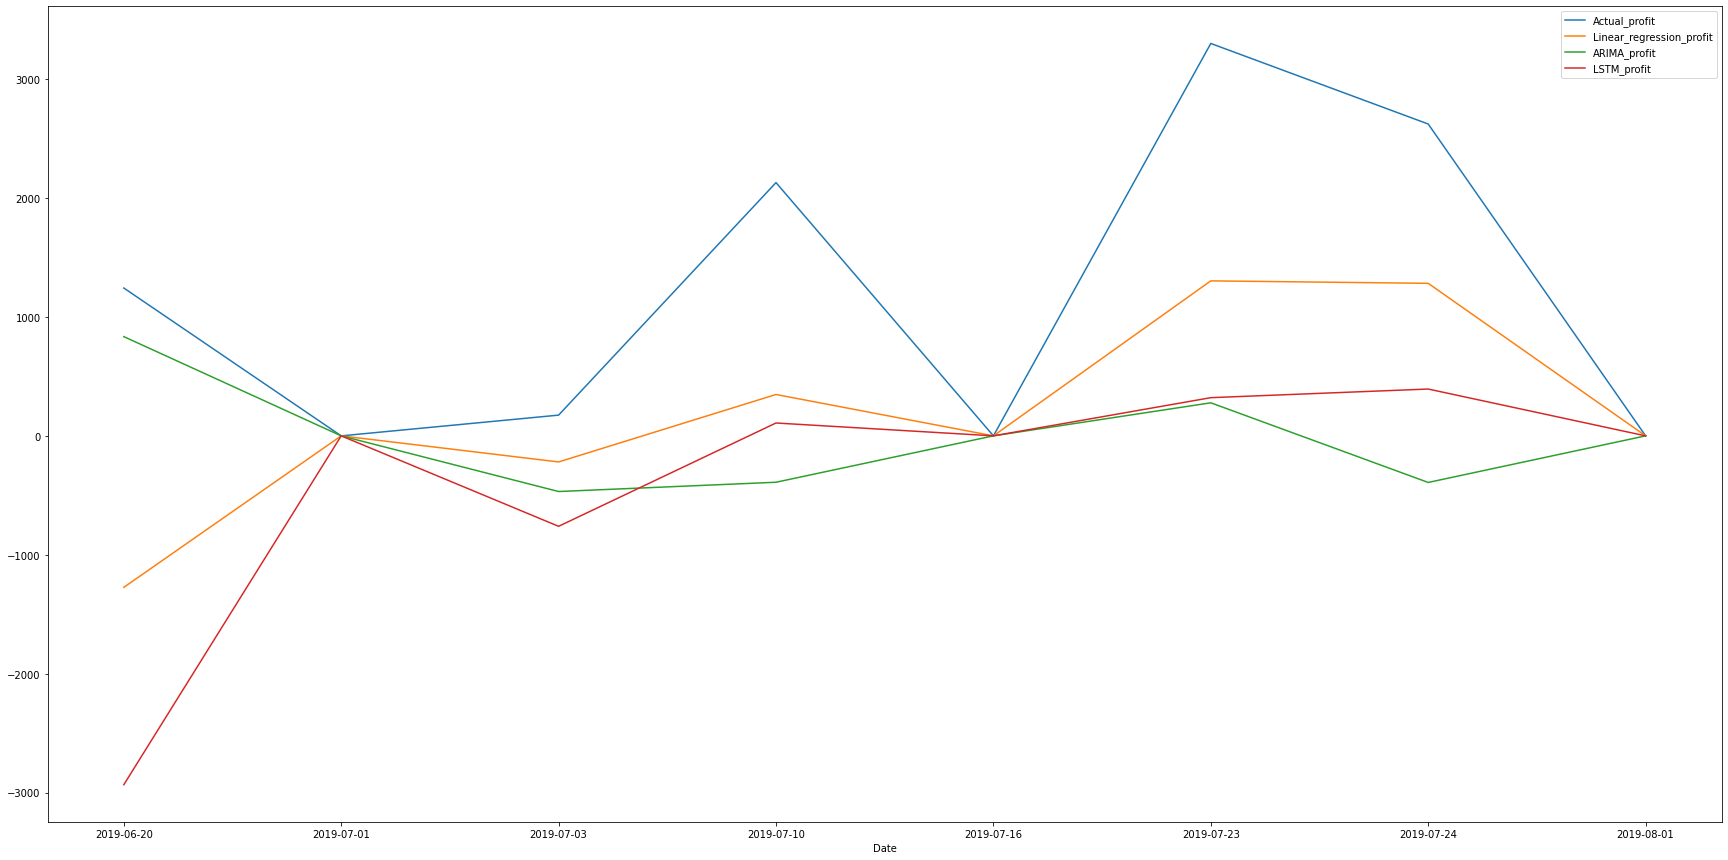

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---